# **Lab 6: Analyzing, Manipulating and Visualizing Data with Python Pandas**

In this lab, we will use Python Pandas for data processing, manipulating and visualizing data. This lab can be done in pairs. Computer Science majors cannot pair with each other. You can do it solo if you wish. Pairs are not required.

Work **must** be done in your Colab notebook.  **Before you start working on your solution, save a copy to your Google Drive (as the original is read-only)**.   Answer questions directly in the notebook where indicated.  As you are working on the file, make sure to save as you  go.  When you are complete, save your notebook, download it and submit it via Canvas (You can download your notebook from the file menu ** File -> Download -> Download .ipynb **).  

With the Colab notebook, you can write and run your Python code directly in the bookbook.  To run your code, click on the play button and the left hand side of your code.   The output willl appear immediately below your code.

In [ ]:
#This is a Python Comment
#Click the play button (on the left hand side of the code block) to run this code.
print("Hello!  My Python code runs!")

Hello!  My Python code runs!


More info on Pandas:
* [https://pandas.pydata.org/docs/getting_started/index.html#getting-started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

* [https://www.w3schools.com/python/pandas/](https://www.w3schools.com/python/pandas/)

# **Objectives**

 * Use Python to connect to a remote server and fetch CSV data files.
 * Store data in CSV file format in Colab.
 * Load data into a Pandas DataFrame
 * Perform data analysis and linear regression on relational data.
 * Perform data analysis on PM2.5 Air Quality data.
 * Visualize PM2.5 Air Quality

 The data file contains PM2.5 air quality data for stations in BC.  PM2.5, or fine particulates, refers to particles that are 2.5 microns or smaller in diameter. PM2.5 is one of the most important outdoor air pollutants in B.C. from a human health perspective. Details [here](https://www2.gov.bc.ca/gov/content/environment/air-land-water/air/air-quality-management/regulatory-framework/objectives-standards/pm2-5#:~:text=2.5,from%20a%20human%20health%20perspective).

**Question  #1 - Loading and Using a Pandas DataFrame (8 marks)**

Write a Python program to query fetch a CSV file from a remote serve.

**Details:**
*    Put a comment at the top of the question 1 Python notebook codeblock with your name and student number. (0.5 mark)
*    Make a connection to `https://www.env.gov.bc.ca/epd/bcairquality/aqo/csv/Hourly_Raw_Air_Data/Air_Quality/PM25.csv`and programmatically use Python to download and store the file in your Colab Notebook. This file contains hourly air quality data for numerous sampling stations in BC. Save the file as `PM25.csv`. (1 mark)
* Load the CSV file into a Pandas DataFrame (0.5 mark)
* Using Pandas, determine the number of rows and columns (hint: shape) of the data, and print out the results (0.5 marks)
* Using Pandas, print out the last 8 rows of the DataFrame (0.5)
* Using Pandas, calculate the mean, max and min on RAW_VALUES (create a new series for each measure) grouped by the station name(hint: use Pandas `groupby`)
(3 marks)
* Using Pandas, sort the mean value series in-place in ascending order. (0.5 mark)
* Using Pandas, print out the 15 stations with the lowest mean average PM2.5. (0.5 mark)
* Plot the 15 lowest mean air quality using a bar chart. (1 mark)


**Answer Question 1 in the following code block.**

In [19]:
#Answer question 1 here
#Name: Bhavya Bhagchandani
#Student Number: 31715618

import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="https://www.env.gov.bc.ca/epd/bcairquality/aqo/csv/Hourly_Raw_Air_Data/Air_Quality/PM25.csv"
data = ""
with urllib.request.urlopen(url) as site:
  data = site.read().decode()
outfile = open("PM25.csv", "w")
outfile.write(data)
outfile.close()

df = pd.read_csv("PM25.csv")
print(df.shape)

print(df.tail(8))
print(df.groupby("STATION_NAME")['RAW_VALUE'].mean())
print(df.groupby("STATION_NAME")['RAW_VALUE'].max())
print(df.groupby("STATION_NAME")['RAW_VALUE'].min())
print(df.groupby("STATION_NAME")['RAW_VALUE'].mean().sort_values(ascending=True))
print(df.groupby("STATION_NAME")['RAW_VALUE'].mean().sort_values(ascending=True).head(15))

data = df.groupby("STATION_NAME")['RAW_VALUE'].mean().sort_values(ascending=True).head(15)
data_x = data["STATION_NAME"]
data_y = data["RAW_VALUE"]
plt.bar(data_x, data_y)
plt.legend()
plt.tight_layout()
plt.show()


(48699, 10)
               DATE_PST       STATION_NAME  RAW_VALUE  REPORTED_VALUE  \
48691  2024-10-07 07:00  Willow Creek Mine        NaN             NaN   
48692  2024-10-07 06:00  Willow Creek Mine        NaN             NaN   
48693  2024-10-07 05:00  Willow Creek Mine        NaN             NaN   
48694  2024-10-07 04:00  Willow Creek Mine        NaN             NaN   
48695  2024-10-07 03:00  Willow Creek Mine        NaN             NaN   
48696  2024-10-07 02:00  Willow Creek Mine        NaN             NaN   
48697  2024-10-07 01:00  Willow Creek Mine        NaN             NaN   
48698  2024-10-07 00:00  Willow Creek Mine        NaN             NaN   

      INSTRUMENT  UNITS PARAMETER   EMS_ID  LATITUDE   LONGITUDE  
48691   API T640  ug/m3      PM25  E330211   55.6355 -122.235639  
48692   API T640  ug/m3      PM25  E330211   55.6355 -122.235639  
48693   API T640  ug/m3      PM25  E330211   55.6355 -122.235639  
48694   API T640  ug/m3      PM25  E330211   55.6355 -122.2356

KeyError: 'STATION_NAME'

**Question #2 - Analyzing Burnaby South PM2.5 Data (7 marks)**

Write a Python program to query the Question 1 dataframe to create a new Pandas Data from that contains air quality data for the `Burnaby South` station.
You will need to use `matplotlib` (make sure to import the modules at the start of your code block).

  

**Details:**

 * Put a comment at the top of the question 2 Python code block with your name and student number. (0.5 mark)
 * Query that Pandas Datafrom from Q1 to return the results for the `STATION_NAME` for `Burnaby South`.  Store the results in a new DataFrame. Print out the last 8 rows of this dataframe. [Hint](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) (1 mark)
 * Plot the RAW_VALUES over DATE_PST for the station using both a Pandas scatter plot
(1 mark)
 * Print out the data types for each of the columns in the DataFrame. (0.5 marks)
 * Update the date column so that it is using the correct DateTime type. Print out the updated type of this column. (0.5 marks)
 * Re-plot the data for RAW_VALUE for the station with a line plot with the updated DataFrame (i.e., with correct type for date) (0.5 marks)
 * Plot a histogram with 50 buckests, showing the distribution of air quality readings for the `Burnaby South` station.    (1 mark)

              DATE_PST   STATION_NAME  RAW_VALUE  REPORTED_VALUE INSTRUMENT  \
3687  2024-10-07 07:00  Burnaby South   4.024361             4.0  PM25_T640   
3688  2024-10-07 06:00  Burnaby South   4.001056             4.0  PM25_T640   
3689  2024-10-07 05:00  Burnaby South   4.133389             4.1  PM25_T640   
3690  2024-10-07 04:00  Burnaby South   4.510944             4.5  PM25_T640   
3691  2024-10-07 03:00  Burnaby South   4.409361             4.4  PM25_T640   
3692  2024-10-07 02:00  Burnaby South   4.722195             4.7  PM25_T640   
3693  2024-10-07 01:00  Burnaby South   4.888758             4.9  PM25_T640   
3694  2024-10-07 00:00  Burnaby South   3.700278             3.7  PM25_T640   

      UNITS PARAMETER   EMS_ID  LATITUDE  LONGITUDE  
3687  ug/m3      PM25  E207418   49.2152  -122.9857  
3688  ug/m3      PM25  E207418   49.2152  -122.9857  
3689  ug/m3      PM25  E207418   49.2152  -122.9857  
3690  ug/m3      PM25  E207418   49.2152  -122.9857  
3691  ug/m3      P

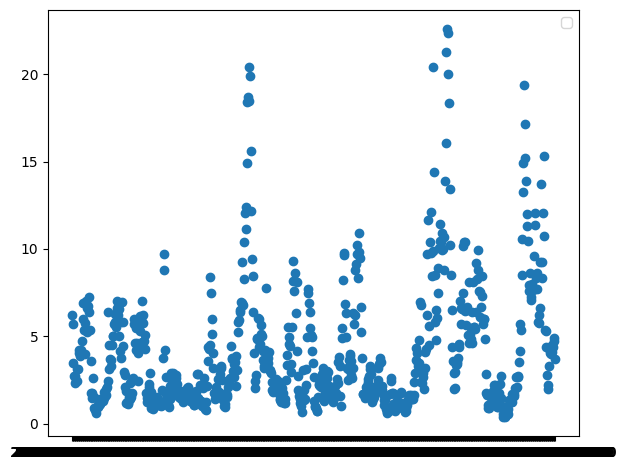

<ipython-input-11-bf9bc8534b84>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DATE_PST'] = pd.to_datetime(new_df['DATE_PST'])


                DATE_PST   STATION_NAME  RAW_VALUE  REPORTED_VALUE INSTRUMENT  \
3687 2024-10-07 07:00:00  Burnaby South   4.024361             4.0  PM25_T640   
3688 2024-10-07 06:00:00  Burnaby South   4.001056             4.0  PM25_T640   
3689 2024-10-07 05:00:00  Burnaby South   4.133389             4.1  PM25_T640   
3690 2024-10-07 04:00:00  Burnaby South   4.510944             4.5  PM25_T640   
3691 2024-10-07 03:00:00  Burnaby South   4.409361             4.4  PM25_T640   
3692 2024-10-07 02:00:00  Burnaby South   4.722195             4.7  PM25_T640   
3693 2024-10-07 01:00:00  Burnaby South   4.888758             4.9  PM25_T640   
3694 2024-10-07 00:00:00  Burnaby South   3.700278             3.7  PM25_T640   

      UNITS PARAMETER   EMS_ID  LATITUDE  LONGITUDE  
3687  ug/m3      PM25  E207418   49.2152  -122.9857  
3688  ug/m3      PM25  E207418   49.2152  -122.9857  
3689  ug/m3      PM25  E207418   49.2152  -122.9857  
3690  ug/m3      PM25  E207418   49.2152  -122.9857  


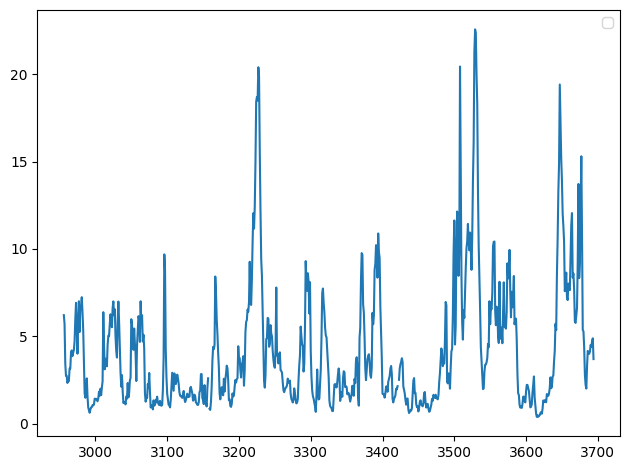

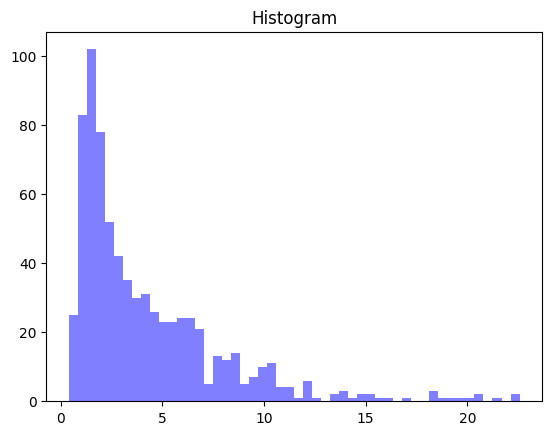

In [11]:
#Answer question 2 here
#Name: Bhavya Bhagchandani
#Student Number: 31715618

new_df = df.query('STATION_NAME == "Burnaby South"')
print(new_df.tail(8))
print(new_df.dtypes)

data_y = new_df["RAW_VALUE"]
data_x = new_df["DATE_PST"]
plt.scatter(data_x, data_y)
plt.legend()
plt.tight_layout()
plt.show()

new_df['DATE_PST'] = pd.to_datetime(new_df['DATE_PST'])
print(new_df.tail(8))

data_y = new_df["RAW_VALUE"]
plt.plot(data_y)
plt.legend()
plt.tight_layout()
plt.show()

num_bins = 50
data_y = new_df["RAW_VALUE"]
n, bins, patches = plt.hist(data_y, num_bins,
density=False, facecolor='blue',
alpha=0.5)
plt.title('Histogram')
plt.show()

**Question #3.1 - Analyzing Database Data (5 marks)**

Write a Python program to query the dataset to extract the 'LATITUDE', 'LONGITUDE', and 'REPORTED_VALUE' greater than 3.0 (inclusive). Print the latitude, longitude, and reported_value in ascending order by reported_value then perform a linear regressions between latitude and reported_value.
to determine if there is a relationship between them.  For these problems, you will need to use SciPy and Numpy.

**Details:**

 * Put a comment at the top of the question 3 Python code block with your name and student number. (0.5 mark)
 * Write and execute a pandas query that returns the latitude, longitude, reported_value with reported_value greater than 4.0 (inclusive) ordered by reported_value ascending. (1.5 mark)
 * NOTE: Create a new dataframe and save the result of the query.
 * Create lists of the data so that you can perform linear regression.(0.5 mark)
 * Perform a linear regression between LATITUDE and REPORTED_VALUE and output the predicted formula, y-values, prediction error, and residual error. (1.5 mark)
 * Show the linear regression results in a chart. (1 mark)

        LATITUDE   LONGITUDE  REPORTED_VALUE
6148   49.682603 -124.996222             4.0
23924  54.066909 -128.639131             4.0
23923  54.066909 -128.639131             4.0
23922  54.066909 -128.639131             4.0
23910  54.066909 -128.639131             4.0
...          ...         ...             ...
3991   54.230700 -125.764300           147.4
21491  53.973228 -128.650768           148.0
3992   54.230700 -125.764300           190.6
44443  54.016300 -124.006100           290.0
21951  53.973228 -128.650768           985.0

[21172 rows x 3 columns]
Predicted y-values: 6148     8.317397
23924    9.750765
23923    9.750765
23922    9.750765
23910    9.750765
           ...   
3991     9.804313
21491    9.720138
3992     9.804313
44443    9.734219
21951    9.720138
Name: LATITUDE, Length: 21172, dtype: float64
Prediction error: 6148      -4.317397
23924     -5.750765
23923     -5.750765
23922     -5.750765
23910     -5.750765
            ...    
3991     137.595687
21491    138

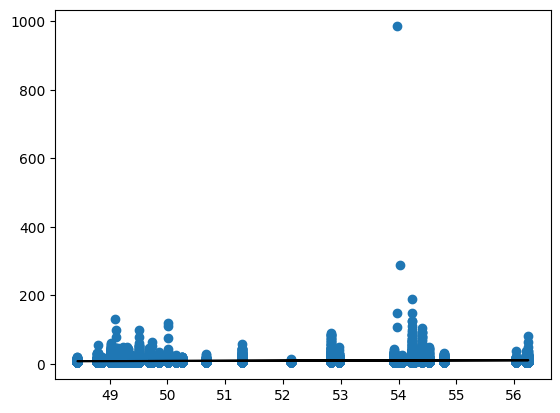

In [13]:
#Answer question 3.1 here
#Name: Bhavya Bhagchandani
#Student Number: 31715618

new_df1 = df.query('REPORTED_VALUE >= 4.0')[["LATITUDE", "LONGITUDE", "REPORTED_VALUE"]].sort_values('REPORTED_VALUE', ascending=True)
print(new_df1)

from scipy import stats
import numpy as np

x = new_df1['LATITUDE']
y = new_df1['REPORTED_VALUE']

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
predict_y = intercept + slope * x
print("Predicted y-values:",predict_y)
pred_error = y - predict_y
print("Prediction error:",pred_error)
degr_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degr_freedom)
print("Residual error:",residual_std_error)
plt.plot(x, y, 'o')
plt.plot(x, predict_y, 'k-')
plt.show()


**Question 3.2 Analyse DataBase Data**

Write a Python program to group the stations based on their name and show the lline plot of the monthly trend for the top 5 stations with the hieghst average PM2.5



**Details:**

* use matplot.lib.pyplot library [Hint](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).
* create a plot with a size of 12 and 6. (0.25 mark)
* put "Monthly Pm2.5 Trends for Tops 5 Stations - Your first name". (0.25 marks)
* put a meaningful name for xlable and ylable. (0.5 marks)
* Show the plot and save it in a png file. (0.5 marks)
Note: the file should be saved in the same repository as the notebook file.

* Explain your undrestanding from this line plot. Write your answer as a markdown in this notebook. (1 marks)

                         RAW_VALUE  REPORTED_VALUE   LATITUDE   LONGITUDE
STATION_NAME                                                             
Burns Lake Fire Centre   10.939645       10.940676  54.230700 -125.764300
Houston Firehall          9.999116       10.002599  54.397200 -126.645000
Grand Forks City Hall     9.502408        9.503804  49.031168 -118.439088
Golden Helipad            8.521385        8.520596  51.297500 -116.966000
Cranbrook Muriel Baxter   8.477379        8.477027  49.507103 -115.753682


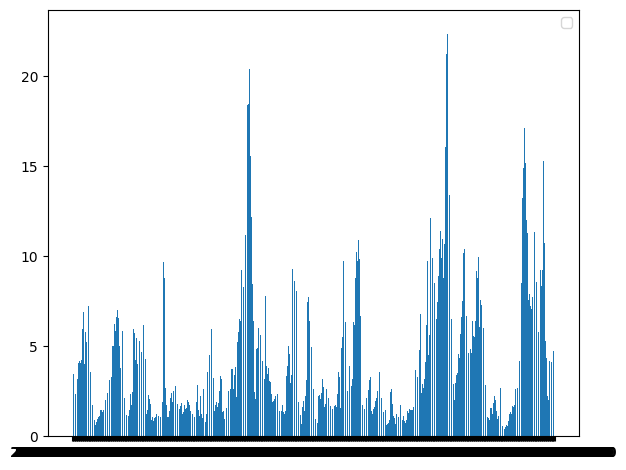

In [18]:
#Answer question 3.2 here
#Name: Bhavya Bhagchandani
#Student Number: 31715618

data = df.groupby("STATION_NAME").mean("RAW_VALUE").sort_values('RAW_VALUE', ascending=False).head(5)

print(data)
plt.bar(data_x, data_y)
plt.legend()
plt.tight_layout()
plt.show()


**Question 3.3 Outlier Detection**

Write a python code to detect outliers using Box Plot.


**Details:**
* create a plot with the size of 10 and 6. put "BOX Plot of PM2.5 Values - Your first name" as the title.[Hint](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) (1 marks)
* Calculate the quantile on the Raw_Value column of your dataframe.
* Set the quantile 1 for 0.25% of the data.(0.25 marks)
* Set the quantile 3 for 0.75% of the data.(o.25 marks)
* Calculate the lower and upper bound. (o.5 marks)
* Show the plot and save it as a png file. (1 marks)
* Analyse the plot. (1 marks)
* What would you change to improve your plot (How would you handle the outliers). (0.5 marks)


In [22]:
#Answer question 3.3 here
#Name: Bhavya Bhagchandani
#Student Number: 31715618

print(df["RAW_VALUE"].quantile(0.25))
print(df["RAW_VALUE"].quantile(0.75))


1.71050675
6.27997975


**Submission**

Submit your .ipynb (colab Python notebook) via Cavnas.  